In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df =data.drop(['id'], axis=1)

In [6]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
x = df.drop(['cardio'], axis=1)

In [8]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [9]:
y = df['cardio']

In [10]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [11]:
from sklearn.feature_selection import SelectKBest

In [12]:
from sklearn.feature_selection import f_classif

In [13]:
fit_feature = SelectKBest(score_func=f_classif)

In [14]:
fit_feature.fit(x,y)

SelectKBest()

In [15]:
score_col = pd.DataFrame(fit_feature.scores_, columns=['score'])

In [16]:
score_col

,score
0,4209.007957
1,4.603641
2,8.197397
3,2388.777887
4,208.339524
5,303.629011
6,3599.361137
7,562.772977
8,16.790541
9,3.761355


In [17]:
nam_col = pd.DataFrame(x.columns)

In [18]:
top_feature = pd.concat([nam_col, score_col], axis=1)

In [19]:
top_feature

,0,score
0,age,4209.007957
1,gender,4.603641
2,height,8.197397
3,weight,2388.777887
4,ap_hi,208.339524
5,ap_lo,303.629011
6,cholesterol,3599.361137
7,gluc,562.772977
8,smoke,16.790541
9,alco,3.761355


In [20]:
top_feature.nlargest(8,score_col)

,0,score
0,age,4209.007957
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494
8,smoke,16.790541


In [21]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [22]:
df1 = df.drop(['gender','height','alco'],axis=1)

In [23]:
df1

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,cardio
0,18393,62.0,110,80,1,1,0,1,0
1,20228,85.0,140,90,3,1,0,1,1
2,18857,64.0,130,70,3,1,0,0,1
3,17623,82.0,150,100,1,1,0,1,1
4,17474,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
69995,19240,76.0,120,80,1,1,1,1,0
69996,22601,126.0,140,90,2,2,0,1,1
69997,19066,105.0,180,90,3,1,0,0,1
69998,22431,72.0,135,80,1,2,0,0,1


In [24]:
x1 = df1.drop(['cardio'], axis=1)

In [25]:
x1

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
0,18393,62.0,110,80,1,1,0,1
1,20228,85.0,140,90,3,1,0,1
2,18857,64.0,130,70,3,1,0,0
3,17623,82.0,150,100,1,1,0,1
4,17474,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...
69995,19240,76.0,120,80,1,1,1,1
69996,22601,126.0,140,90,2,2,0,1
69997,19066,105.0,180,90,3,1,0,0
69998,22431,72.0,135,80,1,2,0,0


In [26]:
y1 = df1['cardio']

In [27]:
y1

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x1,y1, test_size=0.3, random_state=11)

In [30]:
xtrain

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
60991,21189,65.0,120,80,1,1,0,1
24355,22687,50.0,110,70,1,1,0,1
40247,20315,95.0,130,80,1,1,0,1
43969,18106,65.0,110,58,1,1,0,1
48058,15309,80.0,150,90,1,1,0,1
...,...,...,...,...,...,...,...,...
30369,20472,99.0,190,1000,2,1,0,0
57676,22505,56.0,110,70,1,1,0,1
21584,22348,78.0,120,80,3,3,0,1
36543,22477,70.0,110,70,1,1,0,1


In [31]:
xtest

,age,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active
61700,19098,95.0,160,80,1,1,0,1
7771,18008,67.0,140,89,1,1,0,0
1856,20274,78.0,140,80,1,1,0,1
5914,21030,88.0,120,80,3,1,0,1
33661,21187,76.0,110,70,2,1,0,1
...,...,...,...,...,...,...,...,...
32798,19797,72.0,120,79,1,1,0,1
40275,15909,60.0,120,80,1,1,1,1
40995,23413,70.0,120,80,1,1,0,0
15902,15347,82.0,100,60,1,1,0,1


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
Rclf = RandomForestClassifier()

In [34]:
Rclf.fit(xtrain, ytrain)

RandomForestClassifier()

In [35]:
Rclf.score(xtest, ytest)

0.6897142857142857

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
Dclf = DecisionTreeClassifier()

In [38]:
Dclf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [39]:
Dclf.score(xtest, ytest)

0.6352857142857142

***Feature Importance***

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

In [41]:
model = ExtraTreesClassifier()

In [42]:
model.fit(x,y)

ExtraTreesClassifier()

In [43]:
model.feature_importances_

array([0.28992888, 0.00530119, 0.1704506 , 0.17683792, 0.17750326,
       0.11041373, 0.04548299, 0.01130566, 0.00386151, 0.00426863,
       0.00464563])

In [44]:
top = pd.Series(model.feature_importances_, index= x.columns)

In [45]:
top

age            0.289929
gender         0.005301
height         0.170451
weight         0.176838
ap_hi          0.177503
ap_lo          0.110414
cholesterol    0.045483
gluc           0.011306
smoke          0.003862
alco           0.004269
active         0.004646
dtype: float64

<Axes: >

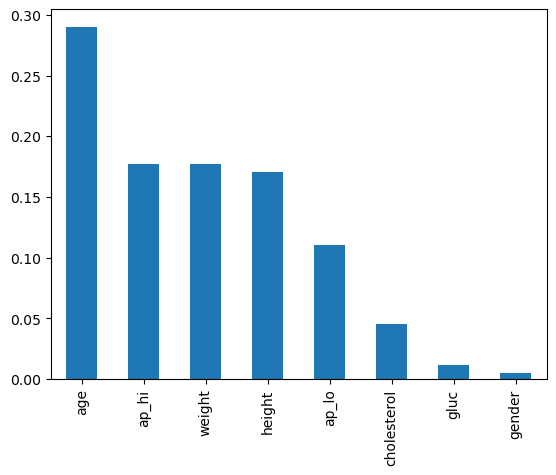

In [47]:
top.nlargest(8).plot(kind='bar')